# Topic Modelling: _Federal Writers' Project_ 

This JupyterNotebook was devised by DARIAH and can be retrieved from https://github.com/DARIAH-DE/Topics.

In [1]:
from pathlib import Path
import dariah
import cophi
from cophi_toolbox import preprocessing
import os
import metadata_toolbox.utils as metadata
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Preprocessing the corpus

Setting the path:

In [2]:
directory = Path("data", "fwp-chunks")

Displaying the files in the folder:

In [3]:
sorted(os.listdir(path=directory))

['alabama_1_0000.txt',
 'alabama_1_0001.txt',
 'alabama_1_0002.txt',
 'alabama_1_0003.txt',
 'alabama_1_0004.txt',
 'alabama_1_0005.txt',
 'alabama_1_0006.txt',
 'alabama_1_0007.txt',
 'alabama_1_0008.txt',
 'alabama_1_0009.txt',
 'alabama_1_0010.txt',
 'alabama_1_0011.txt',
 'alabama_1_0012.txt',
 'arkansas_1_0000.txt',
 'arkansas_1_0001.txt',
 'arkansas_1_0002.txt',
 'arkansas_1_0003.txt',
 'arkansas_1_0004.txt',
 'arkansas_1_0005.txt',
 'arkansas_1_0006.txt',
 'arkansas_1_0007.txt',
 'arkansas_1_0008.txt',
 'arkansas_2_0000.txt',
 'arkansas_2_0001.txt',
 'arkansas_2_0002.txt',
 'arkansas_2_0003.txt',
 'arkansas_2_0004.txt',
 'arkansas_2_0005.txt',
 'arkansas_2_0006.txt',
 'arkansas_2_0007.txt',
 'arkansas_2_0008.txt',
 'arkansas_2_0009.txt',
 'arkansas_3_0000.txt',
 'arkansas_3_0001.txt',
 'arkansas_3_0002.txt',
 'arkansas_3_0003.txt',
 'arkansas_3_0004.txt',
 'arkansas_3_0005.txt',
 'arkansas_3_0006.txt',
 'arkansas_3_0007.txt',
 'arkansas_3_0008.txt',
 'arkansas_3_0009.txt',
 'ark

In [4]:
pattern = '{state}_{number}_{chunk}'

Generates a table featuring the files' abbreviation, author and second mention of author:

In [5]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in directory.glob('*.txt')])
meta[:10]

,state,number,chunk
data\fwp-chunks\alabama_1_0000.txt,alabama,1,0000
data\fwp-chunks\alabama_1_0001.txt,alabama,1,0001
data\fwp-chunks\alabama_1_0002.txt,alabama,1,0002
data\fwp-chunks\alabama_1_0003.txt,alabama,1,0003
data\fwp-chunks\alabama_1_0004.txt,alabama,1,0004
data\fwp-chunks\alabama_1_0005.txt,alabama,1,0005
data\fwp-chunks\alabama_1_0006.txt,alabama,1,0006
data\fwp-chunks\alabama_1_0007.txt,alabama,1,0007
data\fwp-chunks\alabama_1_0008.txt,alabama,1,0008
data\fwp-chunks\alabama_1_0009.txt,alabama,1,0009


Read the documents and display the text of a sample file:

In [6]:
corpus = list(preprocessing.read_files(meta.index))
#corpus[1]

### Tokenising using cophi
(see https://github.com/cophi-wue/cophi-toolbox/blob/master/notebooks/introducing-cophi.ipynb):

In [7]:
corpus, metadata = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=True)

In [8]:
corpus.stats

documents        259.0
types          37065.0
tokens       2377208.0
hapax          24440.0
dtype: float64

### Removal of most frequent words, hapax legomena, and person names
List of most frequent words:

In [9]:
mfw = corpus.mfw(100)
mfw#[:15]

['the',
 'and',
 'be',
 'to',
 'they',
 'he',
 'in',
 'of',
 'have',
 'we',
 'do',
 'not',
 'my',
 'she',
 'on',
 'it',
 'go',
 'get',
 'for',
 'but',
 'when',
 'you',
 'all',
 'with',
 'old',
 'dat',
 'master',
 'that',
 'come',
 'his',
 'say',
 'one',
 'about',
 'would',
 'time',
 'up',
 'at',
 'slave',
 'no',
 'then',
 'out',
 'know',
 'as',
 'see',
 'from',
 'white',
 'so',
 'tell',
 'good',
 'make',
 'man',
 'her',
 'year',
 'house',
 'work',
 'day',
 'take',
 'some',
 'em',
 'what',
 'child',
 'folk',
 'like',
 'never',
 'there',
 'big',
 'by',
 'or',
 'could',
 'live',
 'nigger',
 'just',
 'after',
 'this',
 'back',
 'now',
 'name',
 'mother',
 'down',
 'place',
 'give',
 'war',
 'if',
 'en',
 'little',
 'dere',
 'long',
 'use',
 'too',
 'here',
 'two',
 'our',
 'well',
 'plantation',
 'miss',
 'right',
 'off',
 'want',
 'can',
 'remember']

Hapax legomena (words occuring only once in the corpus):

In [10]:
corpus.hapax[:10]

['aac',
 'aad',
 'aadat',
 'aamy',
 'aaronford',
 'aauctionin',
 'aaxe',
 'aaxin',
 'aba',
 'abab']

Default stopword list:

In [11]:
path_to_stopwordlist = "data/stopwords/en.txt"
extern_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r')]
extern_stopwords[:10]

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act']

List of person names generated through NLTK's Named Entitity Recognition:

In [12]:
path_to_ner = "data/stopwords/fwp-ner.txt"
ner = [line.strip() for line in open(path_to_ner, 'r')]
ner[:10]

['clifton estate',
 'isaac garrett',
 'missy kilpatrick',
 'marse joe echols',
 'artie',
 'marse william chaney',
 'patsey allan',
 'john blackshier',
 'saddy',
 'jim hicks']

Removal of most frequent words, hapax legomena, the default stopword list, and the person names:

In [13]:
features = mfw + corpus.hapax + extern_stopwords + ner

print(f"{len(features)} types will be removed from the corpus.")

47648 types will be removed from the corpus.


Displaying meta data

In [14]:
metadata.iloc[:10]

,uuid,filepath,parent,title,suffix
0,c3d93225-3f7a-11ee-8a22-00090ffe0001,data\fwp-chunks\alabama_1_0000.txt,data\fwp-chunks,alabama_1_0000,.txt
1,c3dab161-3f7a-11ee-80ec-00090ffe0001,data\fwp-chunks\alabama_1_0001.txt,data\fwp-chunks,alabama_1_0001,.txt
2,c3db4fa7-3f7a-11ee-b1a7-00090ffe0001,data\fwp-chunks\alabama_1_0002.txt,data\fwp-chunks,alabama_1_0002,.txt
3,c3ddb63a-3f7a-11ee-8f16-00090ffe0001,data\fwp-chunks\alabama_1_0003.txt,data\fwp-chunks,alabama_1_0003,.txt
4,c3df40c8-3f7a-11ee-a0c6-00090ffe0001,data\fwp-chunks\alabama_1_0004.txt,data\fwp-chunks,alabama_1_0004,.txt
5,c3e0c6ff-3f7a-11ee-9883-00090ffe0001,data\fwp-chunks\alabama_1_0005.txt,data\fwp-chunks,alabama_1_0005,.txt
6,c3e231c5-3f7a-11ee-ab06-00090ffe0001,data\fwp-chunks\alabama_1_0006.txt,data\fwp-chunks,alabama_1_0006,.txt
7,c3e3b8bf-3f7a-11ee-952b-00090ffe0001,data\fwp-chunks\alabama_1_0007.txt,data\fwp-chunks,alabama_1_0007,.txt
8,c3e5104c-3f7a-11ee-849d-00090ffe0001,data\fwp-chunks\alabama_1_0008.txt,data\fwp-chunks,alabama_1_0008,.txt
9,c3e6b4c2-3f7a-11ee-b5d0-00090ffe0001,data\fwp-chunks\alabama_1_0009.txt,data\fwp-chunks,alabama_1_0009,.txt


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [15]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:, :5]

,abandon,abbot,abcs,abeen,abel
c3d93225-3f7a-11ee-8a22-00090ffe0001,0,0,0,0,0
c3dab161-3f7a-11ee-80ec-00090ffe0001,0,0,0,0,0
c3db4fa7-3f7a-11ee-b1a7-00090ffe0001,0,0,0,0,0
c3ddb63a-3f7a-11ee-8f16-00090ffe0001,0,0,0,0,0
c3df40c8-3f7a-11ee-a0c6-00090ffe0001,0,0,0,0,0
...,...,...,...,...,...
c553dd56-3f7a-11ee-b2f8-00090ffe0001,0,0,0,0,0
c5553cfa-3f7a-11ee-bda9-00090ffe0001,0,0,0,0,0
c5569cac-3f7a-11ee-86e6-00090ffe0001,0,0,0,0,0
c5583676-3f7a-11ee-9bdf-00090ffe0001,0,0,0,0,0


In [16]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["title"]).fillna(0).astype(int)
dtm.iloc[:5,:10]

,abandon,abbot,abcs,abeen,abel,ability,abner,aboard,abolish,abolitionist
alabama_1_0000,0,0,0,0,0,0,0,0,0,0
alabama_1_0001,0,0,0,0,0,1,0,0,0,0
alabama_1_0002,0,0,0,0,0,0,0,0,0,0
alabama_1_0003,0,0,0,0,0,1,0,0,0,0
alabama_1_0004,0,0,0,0,0,0,0,0,0,0


## Training the model

In [17]:
# Show all rows of the topic model
pd.set_option('display.max_rows', None)

In [18]:
model = dariah.core.LDA(num_topics=80,
                        num_iterations=5000,
                        mallet="C:/mallet/bin/mallet.bat")
model

<Model: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [19]:
model.fit(dtm)

In [20]:
model.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,coxton,moughty,larn,seat,owner,thoo,hog,recall,property,outen
topic1,owner,require,whip,call,week,pass,clothe,clothing,frolic,morning
topic2,reave,palmer,oats,duggin,bowl,sez,piggy,football,cottonseed,ration
topic3,funeral,feel,call,laugh,side,sunday,frolic,pot,darkie,axe
topic4,find,storm,buh,inlet,barn,beach,island,patridge,plant,member
topic5,scale,tobacco,learn,foke,factory,mayodan,unka,cardwell,pitcher,edge
topic6,owner,kind,remain,allow,parent,service,learn,civil,receive,relate
topic7,call,mile,exslave,sit,find,read,belong,whip,face,soldier
topic8,kum,peeple,soldier,bin,sezs,vote,nite,useter,efn,wat
topic9,warnt,dress,wear,maam,exslave,wukke,sunday,visit,clothe,gyarden


## Inspecting the model

Topic-document distribution

In [21]:
model.topic_document.iloc[:10, :10]

1,alabama_1_0000,alabama_1_0001,alabama_1_0002,alabama_1_0003,alabama_1_0004,alabama_1_0005,alabama_1_0006,alabama_1_0007,alabama_1_0008,alabama_1_0009
topic0,0.000001,0.000001,9.292989e-07,0.000001,0.000001,0.000001,0.000001,0.000001,9.096863e-07,0.000001
topic1,0.000001,0.000001,2.081723e-02,0.000001,0.000001,0.018675,0.000001,0.000001,9.096863e-07,0.000001
topic2,0.000001,0.000001,9.292989e-07,0.000001,0.000001,0.000001,0.000001,0.000001,9.096863e-07,0.000001
topic3,0.000001,0.000001,2.081723e-02,0.000001,0.053726,0.000001,0.051977,0.000001,6.622608e-02,0.075037
topic4,0.000001,0.000001,9.292989e-07,0.000001,0.000803,0.000001,0.000001,0.000001,9.096863e-07,0.000001
topic5,0.000001,0.000001,9.292989e-07,0.000001,0.000001,0.000001,0.000001,0.000001,9.096863e-07,0.000001
topic6,0.000001,0.040162,9.292989e-07,0.000001,0.000001,0.000001,0.000001,0.000001,1.237264e-02,0.000001
topic7,0.079399,0.080322,3.642945e-02,0.049123,0.000001,0.000001,0.000001,0.145518,1.033413e-01,0.118035
topic8,0.000001,0.000001,9.292989e-07,0.000001,0.000001,0.000001,0.000001,0.000001,9.096863e-07,0.000001
topic9,0.000001,0.000001,9.292989e-07,0.000001,0.040094,0.000001,0.000001,0.000001,9.096863e-07,0.000001


Topic-word distribution

In [22]:
model.topics.iloc[:5, :5]

,word0,word1,word2,word3,word4
topic0,coxton,moughty,larn,seat,owner
topic1,owner,require,whip,call,week
topic2,reave,palmer,oats,duggin,bowl
topic3,funeral,feel,call,laugh,side
topic4,find,storm,buh,inlet,barn


In [23]:
#import pandas as pd

# Assuming you have model.topic_document and model.topics as Pandas DataFrames
# Export the topic-document distribution to a CSV file
#model.topic_document.to_csv('topic_document_distribution.csv', index=False)

# Export the topic-word distribution to a CSV file
#model.topics.to_csv('topic_word_distribution.csv', index=False)

## Visualising the model

In [24]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [25]:
#%matplotlib inline
#vis.topic(1)

In [26]:
# Information about possible visualisations:
#help(vis)

In [27]:
#%matplotlib inline

#vis.topic_document()

<AxesSubplot:ylabel='1'>

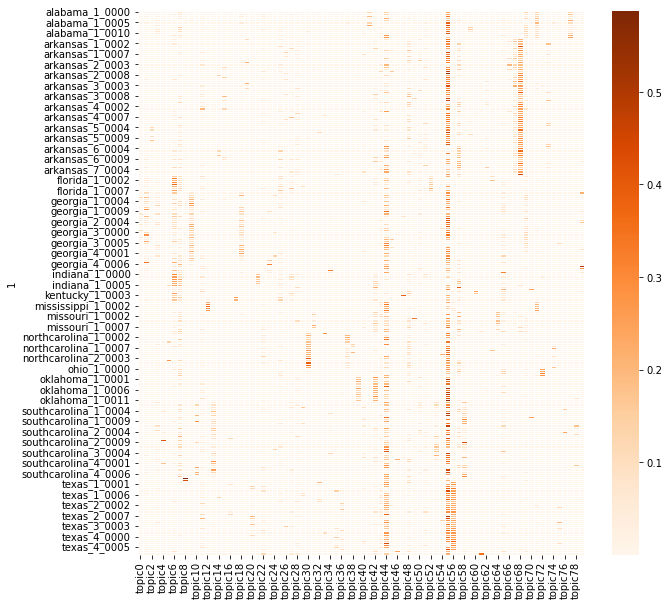

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] 
vis.topic_document(cmap='Oranges')

<AxesSubplot:>

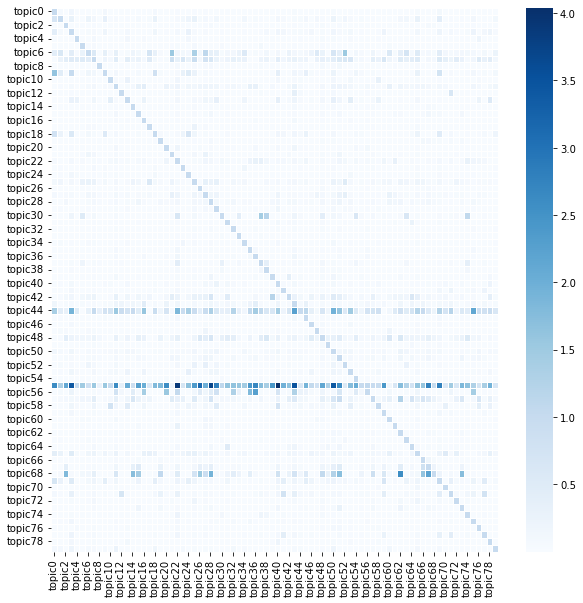

In [29]:
# Comparison of topics
vis.topic_similarities(cbar=True)

KeyError: "['nation', 'european'] not in index"

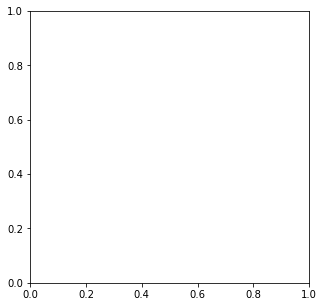

In [30]:
# Comparing the frequency of specific words in the distinct topics
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] 

vis.topic_word(words=["government", "nation", "british", "european"])

In [ ]:
%matplotlib inline

vis.topic_word(words=["crime", "execution"], cbar=True)

Distribution of words within a topic:

In [ ]:
vis.topic("topic1")
plt.rcParams['figure.figsize'] = [10, 10]

Distribution of topics within a given document:

In [ ]:
vis.document("neh-arthur-arthur")
plt.rcParams['figure.figsize'] = [30, 50]